In [1]:
# !pip install statsmodels
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as proportion
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

In [2]:
# The data comes from a longitudinal study of lung tomography measurements of different groups 
# of patients.

# Download at https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv
lungs = pd.read_csv('../data/lung-volume.csv')
lungs.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


In [3]:
lungs.shape

(400, 4)

In [4]:
lungs.dtypes

group       int64
patient    object
t1          int64
t2          int64
dtype: object

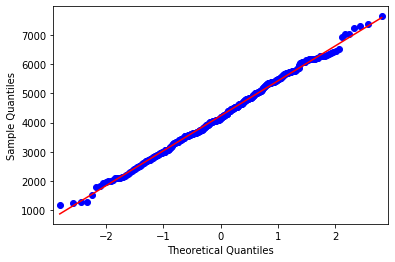

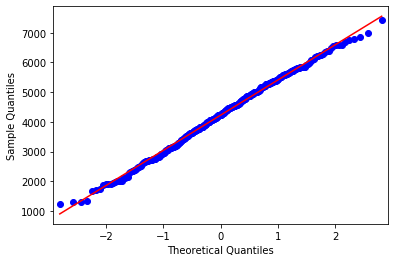

In [5]:
sm.qqplot(lungs['t1'], line='s')
sm.qqplot(lungs['t2'], line='s')
plt.show()

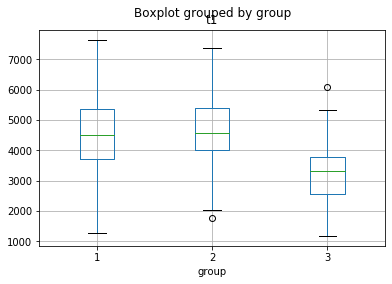

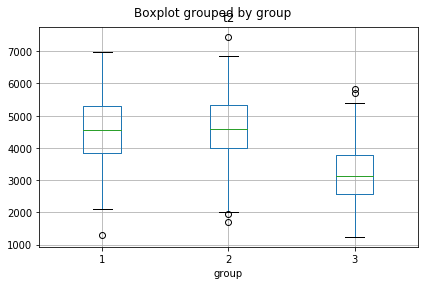

In [6]:
# For each group, is there a significant difference between time 1 and time 2?
#    
lungs.boxplot('t1', by='group')
lungs.boxplot('t2', by='group')
plt.tight_layout()
plt.show()

In [7]:
# Based on the data above I would say no, there is no significant difference

In [8]:
# Is there a significant difference in the mean of all groups at time 2?

In [24]:
groups = lungs.groupby('group')['t2'].mean()
groups.head()

group
1    4539.895
2    4639.600
3    3198.030
Name: t2, dtype: float64

In [33]:
group = lungs[['group', 't2']]
g1 = group[group['group'] == 1]
g2 = group[group['group'] == 2]
g3 = group[group['group'] == 3]

In [36]:
f, p = stats.f_oneway(g1, g2, g3)
p[1]

5.189359990415466e-26